In [ ]:
CAPSTONE TWO DATA WRANGLING FIRST DRAFT - HECTOR SANCHEZ

In [25]:
#Begin the Data Wrangling process by importing the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import missingno as msno
from datetime import datetime
import pyreadstat


In [41]:
#load all datasets
stroke_patients_treated_sav = r'C:\Users\hecsa\Springboard\Springboard Github\Springboard\DataScienceCapstoneTwo\Datasets\Banco AVE.sav'
stroke_patients_treated_xlsx = r'C:\Users\hecsa\Springboard\Springboard Github\Springboard\DataScienceCapstoneTwo\Datasets\Análises para artigo.xlsx' #converted .spv to .xlsx
stroke_patient_outcomes = [r'C:\Users\hecsa\Springboard\Springboard Github\Springboard\DataScienceCapstoneTwo\Datasets\Table_1.xls', r'C:\Users\hecsa\Springboard\Springboard Github\Springboard\DataScienceCapstoneTwo\Datasets\Table_2.xls', r'C:\Users\hecsa\Springboard\Springboard Github\Springboard\DataScienceCapstoneTwo\Datasets\Table_3.xls', r'C:\Users\hecsa\Springboard\Springboard Github\Springboard\DataScienceCapstoneTwo\Datasets\Table_4.xls']

#load SAV dataset
df_stroke_treated_sav, meta = pyreadstat.read_sav(stroke_patients_treated_sav)

#Load the converted .xlsx dataset
df_stroke_treated_xlsx = pd.read_excel(stroke_patients_treated_xlsx)

#Load the .xls datasets and concatenate them
df_xls_list = [pd.read_excel(path) for path in stroke_patient_outcomes]
df_stroke_patient_outcomes_xls = pd.concat(df_xls_list, ignore_index=True)


In [43]:
#We will use df_stroke_treated_sav, df_stroke_treated_xlsx, and df_stroke_patient_outcomes_xls in the data wrangling prcess
#Take a look at the first few rows of each dataset mentioned above
print(df_stroke_treated_sav.head())
print(df_stroke_treated_xlsx.head())
print(df_stroke_patient_outcomes_xls.head())

   Sexo  Idade  Faixa_etaria  Faixa_etaria_2  Estado_Civil  Dia_Semana  \
0   1.0   74.0           3.0             2.0           1.0         6.0   
1   2.0   49.0           2.0             1.0           1.0         1.0   
2   2.0   69.0           3.0             2.0           2.0         5.0   
3   2.0   82.0           4.0             2.0           3.0         7.0   
4   1.0   67.0           3.0             2.0           1.0         2.0   

   Turno_atend  Turno2  Tipo_AVE  Diagnostico  Desfecho_PS  Abordagem  \
0          3.0     2.0       3.0          2.0          1.0        5.0   
1          2.0     1.0       3.0          2.0          1.0        5.0   
2          2.0     1.0       3.0          2.0          1.0        5.0   
3          2.0     1.0       3.0          2.0          1.0        5.0   
4          3.0     2.0       3.0          2.0          1.0        5.0   

   Abordagem_2  Intervenção  Desfecho_final  
0          4.0          2.0             1.0  
1          4.0          

In [49]:
#Use .describe() to get summary statistics for each aataset
print(df_stroke_treated_sav.describe())
print(df_stroke_treated_xlsx.describe())
print(df_stroke_patient_outcomes_xls.describe())

            Sexo     Idade  Faixa_etaria  Faixa_etaria_2  Estado_Civil  \
count  50.000000  50.00000     50.000000       50.000000     50.000000   
mean    1.620000  69.82000      3.000000        1.720000      1.880000   
std     0.490314  16.74867      0.989743        0.453557      1.239486   
min     1.000000  30.00000      1.000000        1.000000      1.000000   
25%     1.000000  58.25000      2.000000        1.000000      1.000000   
50%     2.000000  72.00000      3.000000        2.000000      1.000000   
75%     2.000000  83.75000      4.000000        2.000000      3.000000   
max     2.000000  92.00000      4.000000        2.000000      6.000000   

       Dia_Semana  Turno_atend    Turno2   Tipo_AVE  Diagnostico  Desfecho_PS  \
count   50.000000    50.000000  50.00000  50.000000    50.000000    50.000000   
mean     4.140000     1.940000   1.30000   2.240000     1.480000     1.600000   
std      2.030482     0.818411   0.46291   1.021404     0.504672     0.494872   
min      

In [51]:
#Use .info() to determine the data types and missing values
print(df_stroke_treated_sav.info())
print(df_stroke_treated_xlsx.info())
print(df_stroke_patient_outcomes_xls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sexo            50 non-null     float64
 1   Idade           50 non-null     float64
 2   Faixa_etaria    50 non-null     float64
 3   Faixa_etaria_2  50 non-null     float64
 4   Estado_Civil    50 non-null     float64
 5   Dia_Semana      50 non-null     float64
 6   Turno_atend     50 non-null     float64
 7   Turno2          50 non-null     float64
 8   Tipo_AVE        50 non-null     float64
 9   Diagnostico     50 non-null     float64
 10  Desfecho_PS     50 non-null     float64
 11  Abordagem       50 non-null     float64
 12  Abordagem_2     50 non-null     float64
 13  Intervenção     50 non-null     float64
 14  Desfecho_final  50 non-null     float64
dtypes: float64(15)
memory usage: 6.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (

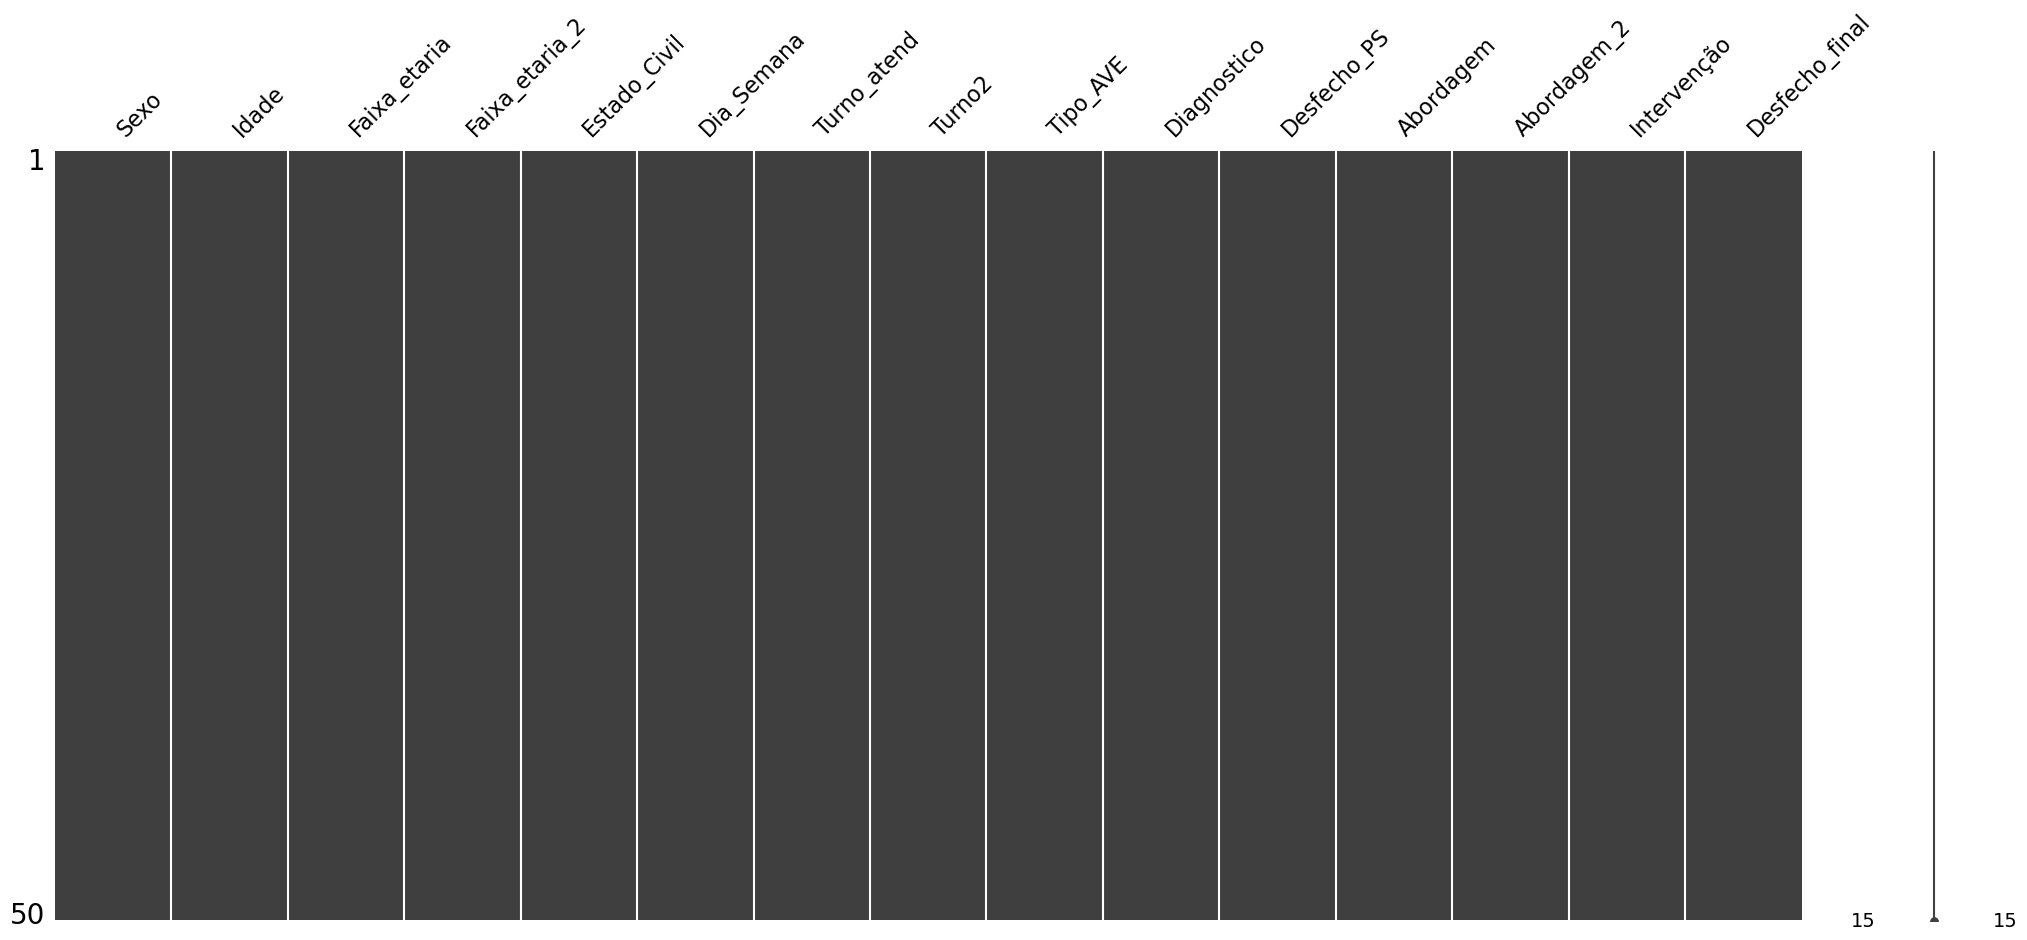

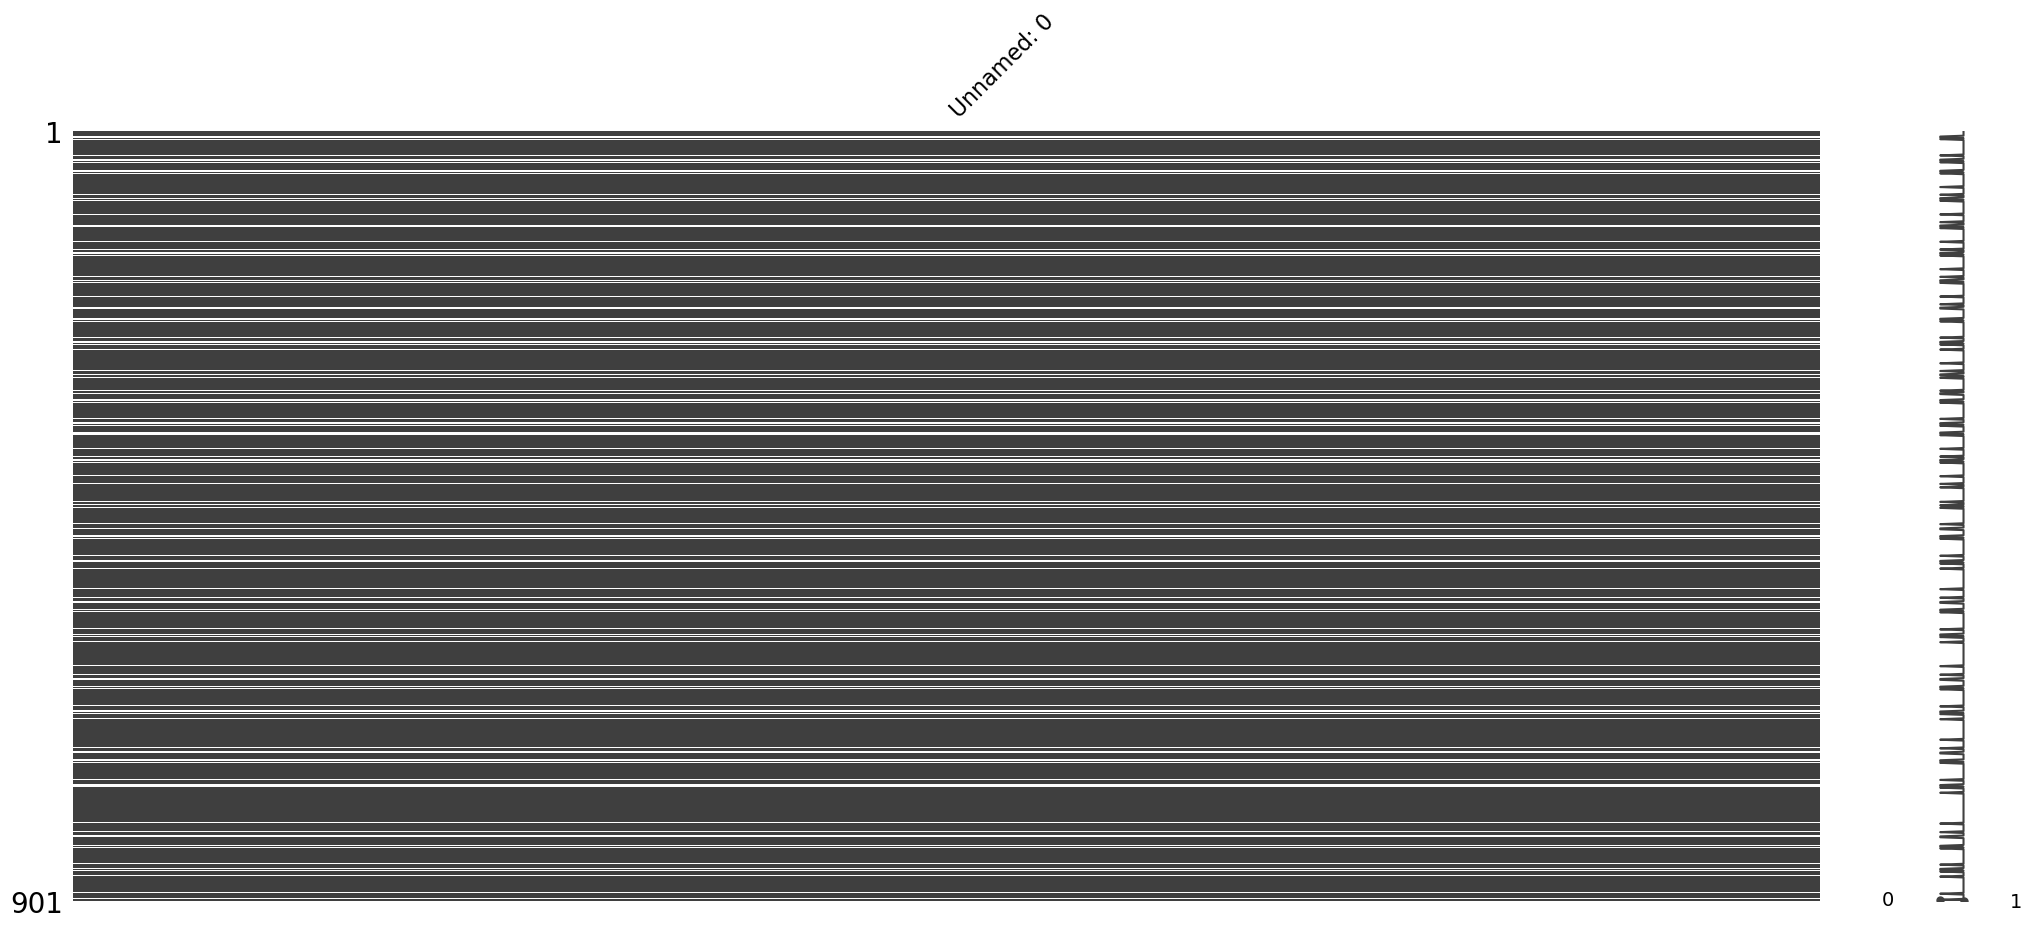

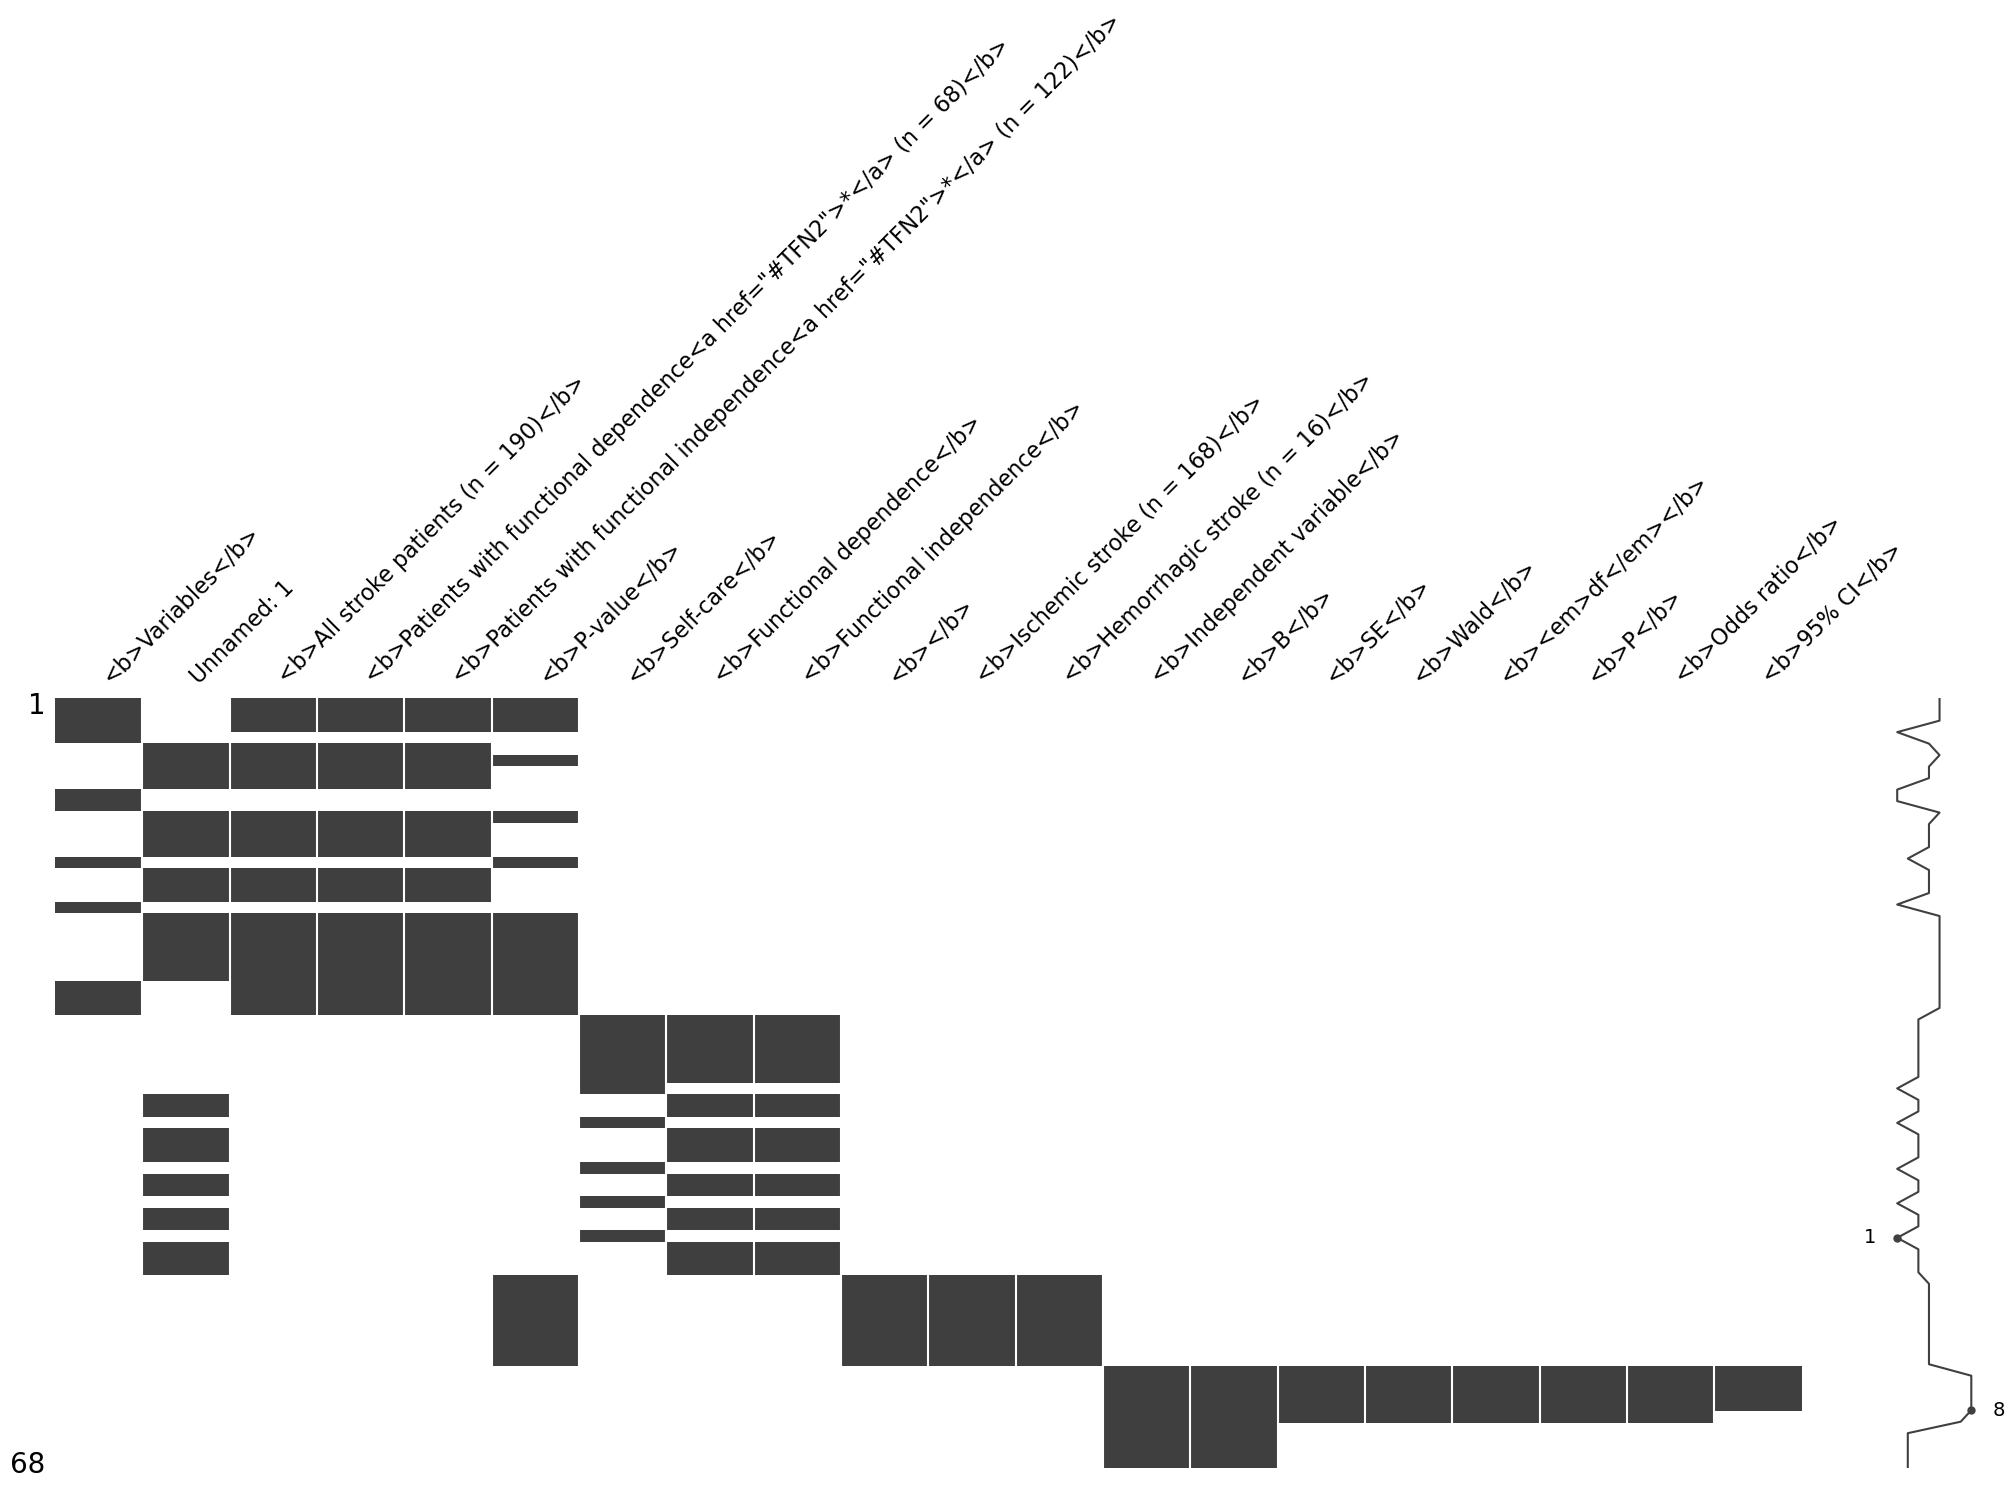

In [55]:
#Visualize the missing values by using msno.matrix()
msno.matrix(df_stroke_treated_sav)
plt.show()
msno.matrix(df_stroke_treated_xlsx)
plt.show()
msno.matrix(df_stroke_patient_outcomes_xls)
plt.show()


In [73]:
#Now we need to Handle the missing values
imputer_mean = SimpleImputer(strategy='mean')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

In [77]:
#Use mean to impute missing values in the numerical columns
numerical_cols_sav = df_stroke_treated_sav.select_dtypes(include=['float64', 'int64']).columns
df_stroke_treated_sav[numerical_cols_sav] = imputer_mean.fit_transform(df_stroke_treated_sav[numerical_cols_sav])

numerical_cols_xls = df_stroke_patient_outcomes_xls.select_dtypes(include=['float64', 'int64']).columns
df_stroke_patient_outcomes_xls[numerical_cols_xls] = imputer_mean.fit_transform(df_stroke_patient_outcomes_xls[numerical_cols_xls])


In [81]:
#Impute missing values in categorical columns with most frequent
categorical_cols_xlsx = df_stroke_treated_xlsx.select_dtypes(include=['object']).columns
df_stroke_treated_xlsx[categorical_cols_xlsx] = imputer_most_frequent.fit_transform(df_stroke_treated_xlsx[categorical_cols_xlsx])

categorical_cols_xls = df_stroke_patient_outcomes_xls.select_dtypes(include=['object']).columns
df_stroke_patient_outcomes_xls[categorical_cols_xls] = imputer_most_frequent.fit_transform(df_stroke_patient_outcomes_xls[categorical_cols_xls])


In [83]:
# Encode the categorical variables in each dataset
encoder = LabelEncoder()

for col in categorical_cols_sav:
    df_stroke_treated_sav[col] = encoder.fit_transform(df_stroke_treated_sav[col])

for col in categorical_cols_xlsx:
    df_stroke_treated_xlsx[col] = encoder.fit_transform(df_stroke_treated_xlsx[col])

for col in categorical_cols_xls:
    df_stroke_patient_outcomes_xls[col] = encoder.fit_transform(df_stroke_patient_outcomes_xls[col])


In [85]:
#Utilize feature scaling
scaler = StandardScaler()

In [91]:
#Scale the numerical columns in df_stroke_treated_sav
df_stroke_treated_sav[numerical_cols_sav] = scaler.fit_transform(df_stroke_treated_sav[numerical_cols_sav])

#Scale the numerical columns in df_xls
df_stroke_patient_outcomes_xls[numerical_cols_xls] = scaler.fit_transform(df_stroke_patient_outcomes_xls[numerical_cols_xls])


In [93]:
# Save the cleaned datasets to new CSV files
df_stroke_treated_sav.to_csv('cleaned_dataset_sav.csv', index=False)
df_stroke_treated_xlsx.to_csv('cleaned_dataset_xlsx.csv', index=False)
df_stroke_patient_outcomes_xls.to_csv('cleaned_dataset_xls.csv', index=False)

In [95]:
#Print head of the cleaned datasets
print(df_stroke_treated_sav.head())
print(df_stroke_treated_xlsx.head())
print(df_stroke_patient_outcomes_xls.head())


       Sexo     Idade  Faixa_etaria  Faixa_etaria_2  Estado_Civil  Dia_Semana  \
0 -1.277333  0.252106 -6.217249e-17        0.623610     -0.717180    0.925339   
1  0.782881 -1.255704 -1.020621e+00       -1.603567     -0.717180   -1.562131   
2  0.782881 -0.049456 -6.217249e-17        0.623610      0.097797    0.427845   
3  0.782881  0.734605  1.020621e+00        0.623610      0.912774    1.422833   
4 -1.277333 -0.170081 -6.217249e-17        0.623610     -0.717180   -1.064637   

   Turno_atend    Turno2  Tipo_AVE  Diagnostico  Desfecho_PS  Abordagem  \
0     1.308343  1.527525  0.751628     1.040833    -1.224745   0.838054   
1     0.074057 -0.654654  0.751628     1.040833    -1.224745   0.838054   
2     0.074057 -0.654654  0.751628     1.040833    -1.224745   0.838054   
3     0.074057 -0.654654  0.751628     1.040833    -1.224745   0.838054   
4     1.308343  1.527525  0.751628     1.040833    -1.224745   0.838054   

   Abordagem_2  Intervenção  Desfecho_final  
0     0.275267  